<!--NAVIGATION-->
# < [Autograd](2-Autograd.ipynb) | Optimization | [Gradient Descent](4-Visualizing_Gradient_Descent.ipynb) >

# Some Operations on Images

## Notebook Introduction

In this short notebook, we will see how to read an image and apply Prewitt filter on it

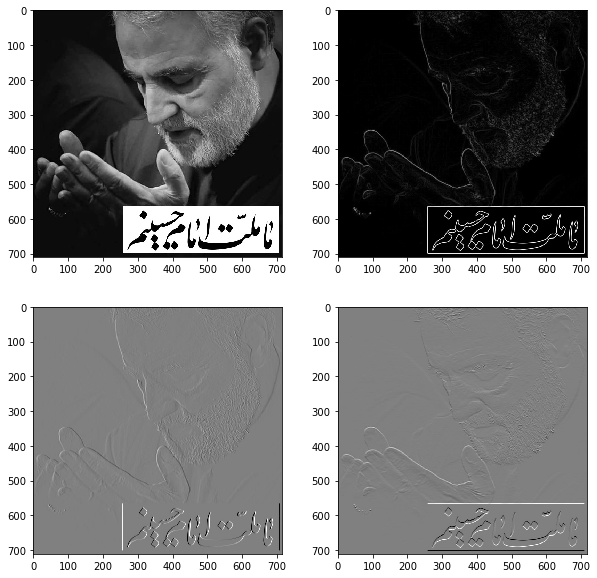

In [33]:
# %matplotlib notebook
from scipy import signal
from scipy import misc,ndimage
from skimage import color
from skimage import io
import numpy as np
import matplotlib.pyplot as plt


img = color.rgb2gray(io.imread('data/Soleymani_mellat.jpg'))
# kh = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype = np.float)
# kv = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype = np.float)
kh = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype = np.float)
kv = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype = np.float)
gx = signal.convolve2d(img, kh, mode='same', boundary = 'symm', fillvalue=0)
gy = signal.convolve2d(img, kv, mode='same', boundary = 'symm', fillvalue=0)

g = np.sqrt(gx * gx + gy * gy)
g = (g-g.min())/ (g.max()-g.min()) * 255.0 
# g *= 255.0 / g.max()

fig = plt.figure(figsize=(10,10))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(221)  # upper left side
ax2 = fig.add_subplot(222)  # upper right side
ax3 = fig.add_subplot(223)  # lower left side
ax4 = fig.add_subplot(224)  # lower right side
ax1.imshow(img)
ax2.imshow(g)
ax3.imshow(gx)
ax4.imshow(gy)
plt.show()

In [19]:
print(g.dtype, g.min(), g.max())
print(gx.dtype, gx.min(), gx.max())

float64 0.0 255.0
float64 -2.996078431372549 2.996078431372549


___

## Some other operations on images using scipy

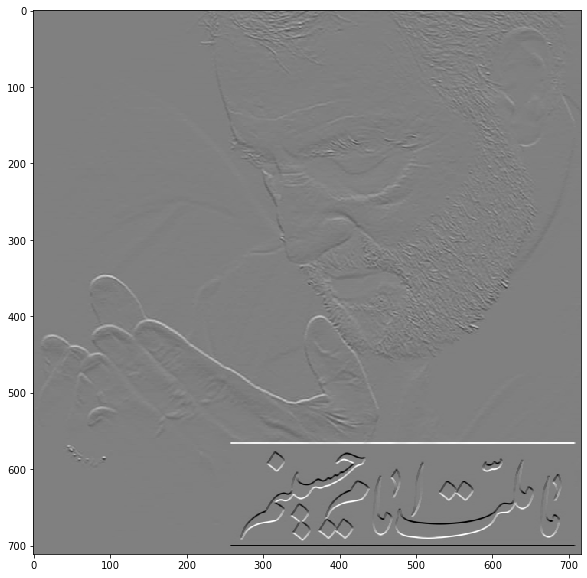

In [35]:
edge_im = ndimage.prewitt(img, axis=0)
fig = plt.figure(figsize=(10,10))
plt.imshow(edge_im)
plt.show()


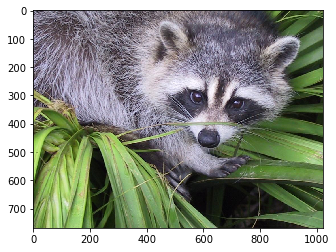

In [2]:
from scipy import misc
f = misc.face()
plt.imshow(f)
plt.show()

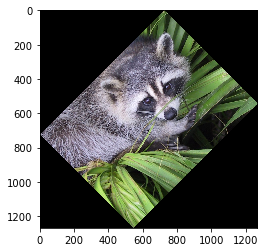

In [3]:
# rotation
from scipy import misc,ndimage
face = misc.face()
rotate_face = ndimage.rotate(face, 45)
plt.imshow(rotate_face)
plt.show()

((768, 1024), numpy.uint8, dtype('uint8'))

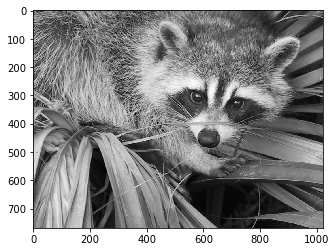

In [4]:
face = misc.face(gray = True)
plt.imshow(face, cmap='gray')
face.shape, type(face[0,0]), face.dtype